# Abstract
Music Genre classification is very important in today’s world due to rapid growth in music tracks, both online and offline. In order to have better access to these we need to index them accordingly. Automatic music genre classification is important to obtain music from a large collection. Most of the current music genre classification techniques uses machine learning techniques. In this paper, we present a music dataset which includes ten different genres. A Deep Learning approach is used in order to train and classify the system. Here convolution neural network is used for training and classification. Feature Extraction is the most crucial task for audio analysis. Mel Frequency Cepstral Coefficient (MFCC) is used as a feature vector for sound sample. The proposed system classifies music into various genres by extracting the feature vector. Our results show that the accuracy level of our system is around 76% and it will greatly improve and facilitate automatic classification of music genres.


# Dataset Used
For this project, the dataset that we will be working with is the GTZAN Music Genre Classification dataset which consists of 1,000 audio tracks, each 30 seconds long. It contains 10 genres, each represented by 100 tracks.
The 10 genres are Blues, Classical, Country, Disco, Hip-hop, Jazz, Metal, Pop, Reggae, Rock.
The dataset has the following folders:

- Genres original — A collection of 10 genres with 100 audio files each, all having a length of 30 seconds (the famous GTZAN dataset, the MNIST of sounds)

- Images original — A visual representation for each audio file. One way to classify data is through neural networks because NN’s usually take in some sort of image representation.

- 2 CSV files — Containing features of the audio files. One file has for each song (30 seconds long) a mean and variance computed over multiple features that can be extracted from an audio file. The other file has the same structure, but the songs are split before into 3 seconds audio files.

GTZAN Dataset with CSV- https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification

Original GTZAN Dataset- http://marsyas.info/downloads/datasets.html

# Installing necessary libraries 
(Librosa is used for audio data)

In [1]:
#!pip install librosa

In [2]:
#!pip install python_speech_features

In [3]:
#!pip install tensorflow

In [2]:
!pip install pydot

In [6]:
!pip install pydub

# Importing Libraries

In [8]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import scipy
import seaborn as sns
%matplotlib inline

import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from python_speech_features import mfcc
import random

from scipy import misc
import glob
from PIL import Image
from keras import layers
from keras.layers import (Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, 
                          Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D)
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
from tensorflow.keras.optimizers import Adam
from keras.initializers import glorot_uniform
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from pydub import AudioSegment
import shutil
from keras.preprocessing.image import ImageDataGenerator
import random

In [6]:
df = pd.read_csv("C:/Users/Admin/Desktop/ML Project/Datasets/features_3_sec.csv")
df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

In [7]:
df.tail()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
9985  rock.00099.5.wav   66149          0.349126         0.080515  0.050019   
9986  rock.00099.6.wav   66149          0.372564         0.082626  0.057897   
9987  rock.00099.7.wav   66149          0.347481         0.089019  0.052403   
9988  rock.00099.8.wav   66149          0.387527         0.084815  0.066430   
9989  rock.00099.9.wav   66149          0.369293         0.086759  0.050524   

       rms_var  spectral_centroid_mean  spectral_centroid_var  \
9985  0.000097             1499.083005          164266.886443   
9986  0.000088             1847.965128          281054.935973   
9987  0.000701             1346.157659          662956.246325   
9988  0.000320             2084.515327          203891.039161   
9989  0.000067             1634.330126          411429.169769   

      spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
9985              1718.707215            85931.574523  ...   42.485981   
9986              1906.468492            99727.037054  ...   32.415203   
9987              1561.859087           138762.841945  ...   78.228149   
9988              2018.366254            22860.992562  ...   28.323744   
9989              1867.422378           119722.211518  ...   38.801735   

      mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
9985    -9.094270   38.326839    -4.246976   31.049839    -5.625813   
9986   -12.375726   66.418587    -3.081278   54.414265   -11.960546   
9987    -2.524483   21.778994     4.809936   25.980829     1.775686   
9988    -5.363541   17.209942     6.462601   21.442928     2.354765   
9989   -11.598399   58.983097    -0.178517   55.761299    -6.903252   

      mfcc19_var  mfcc20_mean  mfcc20_var  label  
9985   48.804092     1.818823   38.966969   rock  
9986   63.452255     0.428857   18.697033   rock  
9987   48.582378    -0.299545   41.586990   rock  
9988   24.843613     0.675824   12.787750   rock  
9989   39.485901    -3.412534   31.727489   rock  

[5 rows x 60 columns]

# Exploratory Data Analysis
Performing an EDA to get an idea about the data and its features

In [9]:
df.shape

(9990, 60)

In [10]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [11]:
# print data information report
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [12]:
# Check for missing values
df.isnull()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  rms_var  \
0        False   False             False            False     False    False   
1        False   False             False            False     False    False   
2        False   False             False            False     False    False   
3        False   False             False            False     False    False   
4        False   False             False            False     False    False   
...        ...     ...               ...              ...       ...      ...   
9985     False   False             False            False     False    False   
9986     False   False             False            False     False    False   
9987     False   False             False            False     False    False   
9988     False   False             False            False     False    False   
9989     False   False             False            False     False    False   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                      False                  False                    False   
1                      False                  False                    False   
2                      False                  False                    False   
3                      False                  False                    False   
4                      False                  False                    False   
...                      ...                    ...                      ...   
9985                   False                  False                    False   
9986                   False                  False                    False   
9987                   False                  False                    False   
9988                   False                  False                    False   
9989                   False                  False                    False   

      spectral_bandwidth_var  ...  mfcc16_var  mfcc17_mean  mfcc17_var  \
0                      False  ...       False        False       False   
1                      False  ...       False        False       False   
2                      False  ...       False        False       False   
3                      False  ...       False        False       False   
4                      False  ...       False        False       False   
...                      ...  ...         ...          ...         ...   
9985                   False  ...       False        False       False   
9986                   False  ...       False        False       False   
9987                   False  ...       False        False       False   
9988                   False  ...       False        False       False   
9989                   False  ...       False        False       False   

      mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  \
0           False       False        False       False        False   
1           False       False        False       False        False   
2           False       False        False       False        False   
3           False       False        False       False        False   
4           False       False        False       False        False   
...           ...         ...          ...         ...          ...   
9985        False       False        False       False        False   
9986        False       False        False       False        False   
9987        False       False        False       False        False   
9988        False       False        False       False        False   
9989        False       False        False       False        False   

      mfcc20_var  label  
0          False  False  
1          False  False  
2          False  False  
3          False  False  
4          False  False  
...          ...    ...  
9985       False  False  
9986       False  False  
9987       False  False  
9988       False  False  
9989       False  False  

[9990 rows x 60 columns]

In [13]:
# print statistical summary of data
df.describe()

length  chroma_stft_mean  chroma_stft_var     rms_mean       rms_var  \
count   9990.0       9990.000000      9990.000000  9990.000000  9.990000e+03   
mean   66149.0          0.379534         0.084876     0.130859  2.676388e-03   
std        0.0          0.090466         0.009637     0.068545  3.585628e-03   
min    66149.0          0.107108         0.015345     0.000953  4.379535e-08   
25%    66149.0          0.315698         0.079833     0.083782  6.145900e-04   
50%    66149.0          0.384741         0.085108     0.121253  1.491318e-03   
75%    66149.0          0.442443         0.091092     0.176328  3.130862e-03   
max    66149.0          0.749481         0.120964     0.442567  3.261522e-02   

       spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
count             9990.000000           9.990000e+03              9990.000000   
mean              2199.219431           4.166727e+05              2241.385959   
std                751.860611           4.349644e+05               543.854449   
min                472.741636           8.118813e+02               499.162910   
25%               1630.680158           1.231961e+05              1887.455790   
50%               2208.628236           2.650692e+05              2230.575595   
75%               2712.581884           5.624152e+05              2588.340505   
max               5432.534406           4.794119e+06              3708.147554   

       spectral_bandwidth_var  rolloff_mean  ...  mfcc16_mean   mfcc16_var  \
count            9.990000e+03   9990.000000  ...  9990.000000  9990.000000   
mean             1.182711e+05   4566.076592  ...     1.448240    49.988755   
std              1.013505e+05   1642.065335  ...     5.735149    34.442816   
min              1.183520e+03    658.336276  ...   -26.850016     1.325786   
25%              4.876553e+04   3378.311110  ...    -2.227478    29.584894   
50%              8.996072e+04   4631.377892  ...     1.461623    41.702393   
75%              1.585674e+05   5591.634521  ...     5.149752    59.274619   
max              1.235143e+06   9487.446477  ...    39.144405   683.932556   

       mfcc17_mean   mfcc17_var  mfcc18_mean   mfcc18_var  mfcc19_mean  \
count  9990.000000  9990.000000  9990.000000  9990.000000  9990.000000   
mean     -4.198706    51.962753     0.739943    52.488851    -2.497306   
std       5.677379    36.400669     5.181313    38.177120     5.111799   
min     -27.809795     1.624544   -20.733809     3.437439   -27.448456   
25%      -7.951722    29.863448    -2.516638    29.636197    -5.734123   
50%      -4.443021    42.393583     0.733772    41.831377    -2.702366   
75%      -0.726945    61.676964     3.888734    62.033906     0.514246   
max      34.048843   529.363342    36.970322   629.729797    31.365425   

        mfcc19_var  mfcc20_mean   mfcc20_var  
count  9990.000000  9990.000000  9990.000000  
mean     54.973829    -0.917584    57.322614  
std      41.585677     5.253243    46.444212  
min       3.065302   -35.640659     0.282131  
25%      30.496412    -4.004475    30.011365  
50%      43.435253    -1.030939    44.332155  
75%      65.328602     2.216603    68.210421  
max    1143.230591    34.212101   910.473206  

[8 rows x 58 columns]

In [14]:
# print correlation matrix
cor=df.corr()

In [15]:
df.isnull().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [16]:
df.isnull().count()

filename                   9990
length                     9990
chroma_stft_mean           9990
chroma_stft_var            9990
rms_mean                   9990
rms_var                    9990
spectral_centroid_mean     9990
spectral_centroid_var      9990
spectral_bandwidth_mean    9990
spectral_bandwidth_var     9990
rolloff_mean               9990
rolloff_var                9990
zero_crossing_rate_mean    9990
zero_crossing_rate_var     9990
harmony_mean               9990
harmony_var                9990
perceptr_mean              9990
perceptr_var               9990
tempo                      9990
mfcc1_mean                 9990
mfcc1_var                  9990
mfcc2_mean                 9990
mfcc2_var                  9990
mfcc3_mean                 9990
mfcc3_var                  9990
mfcc4_mean                 9990
mfcc4_var                  9990
mfcc5_mean                 9990
mfcc5_var                  9990
mfcc6_mean                 9990
mfcc6_var                  9990
mfcc7_me

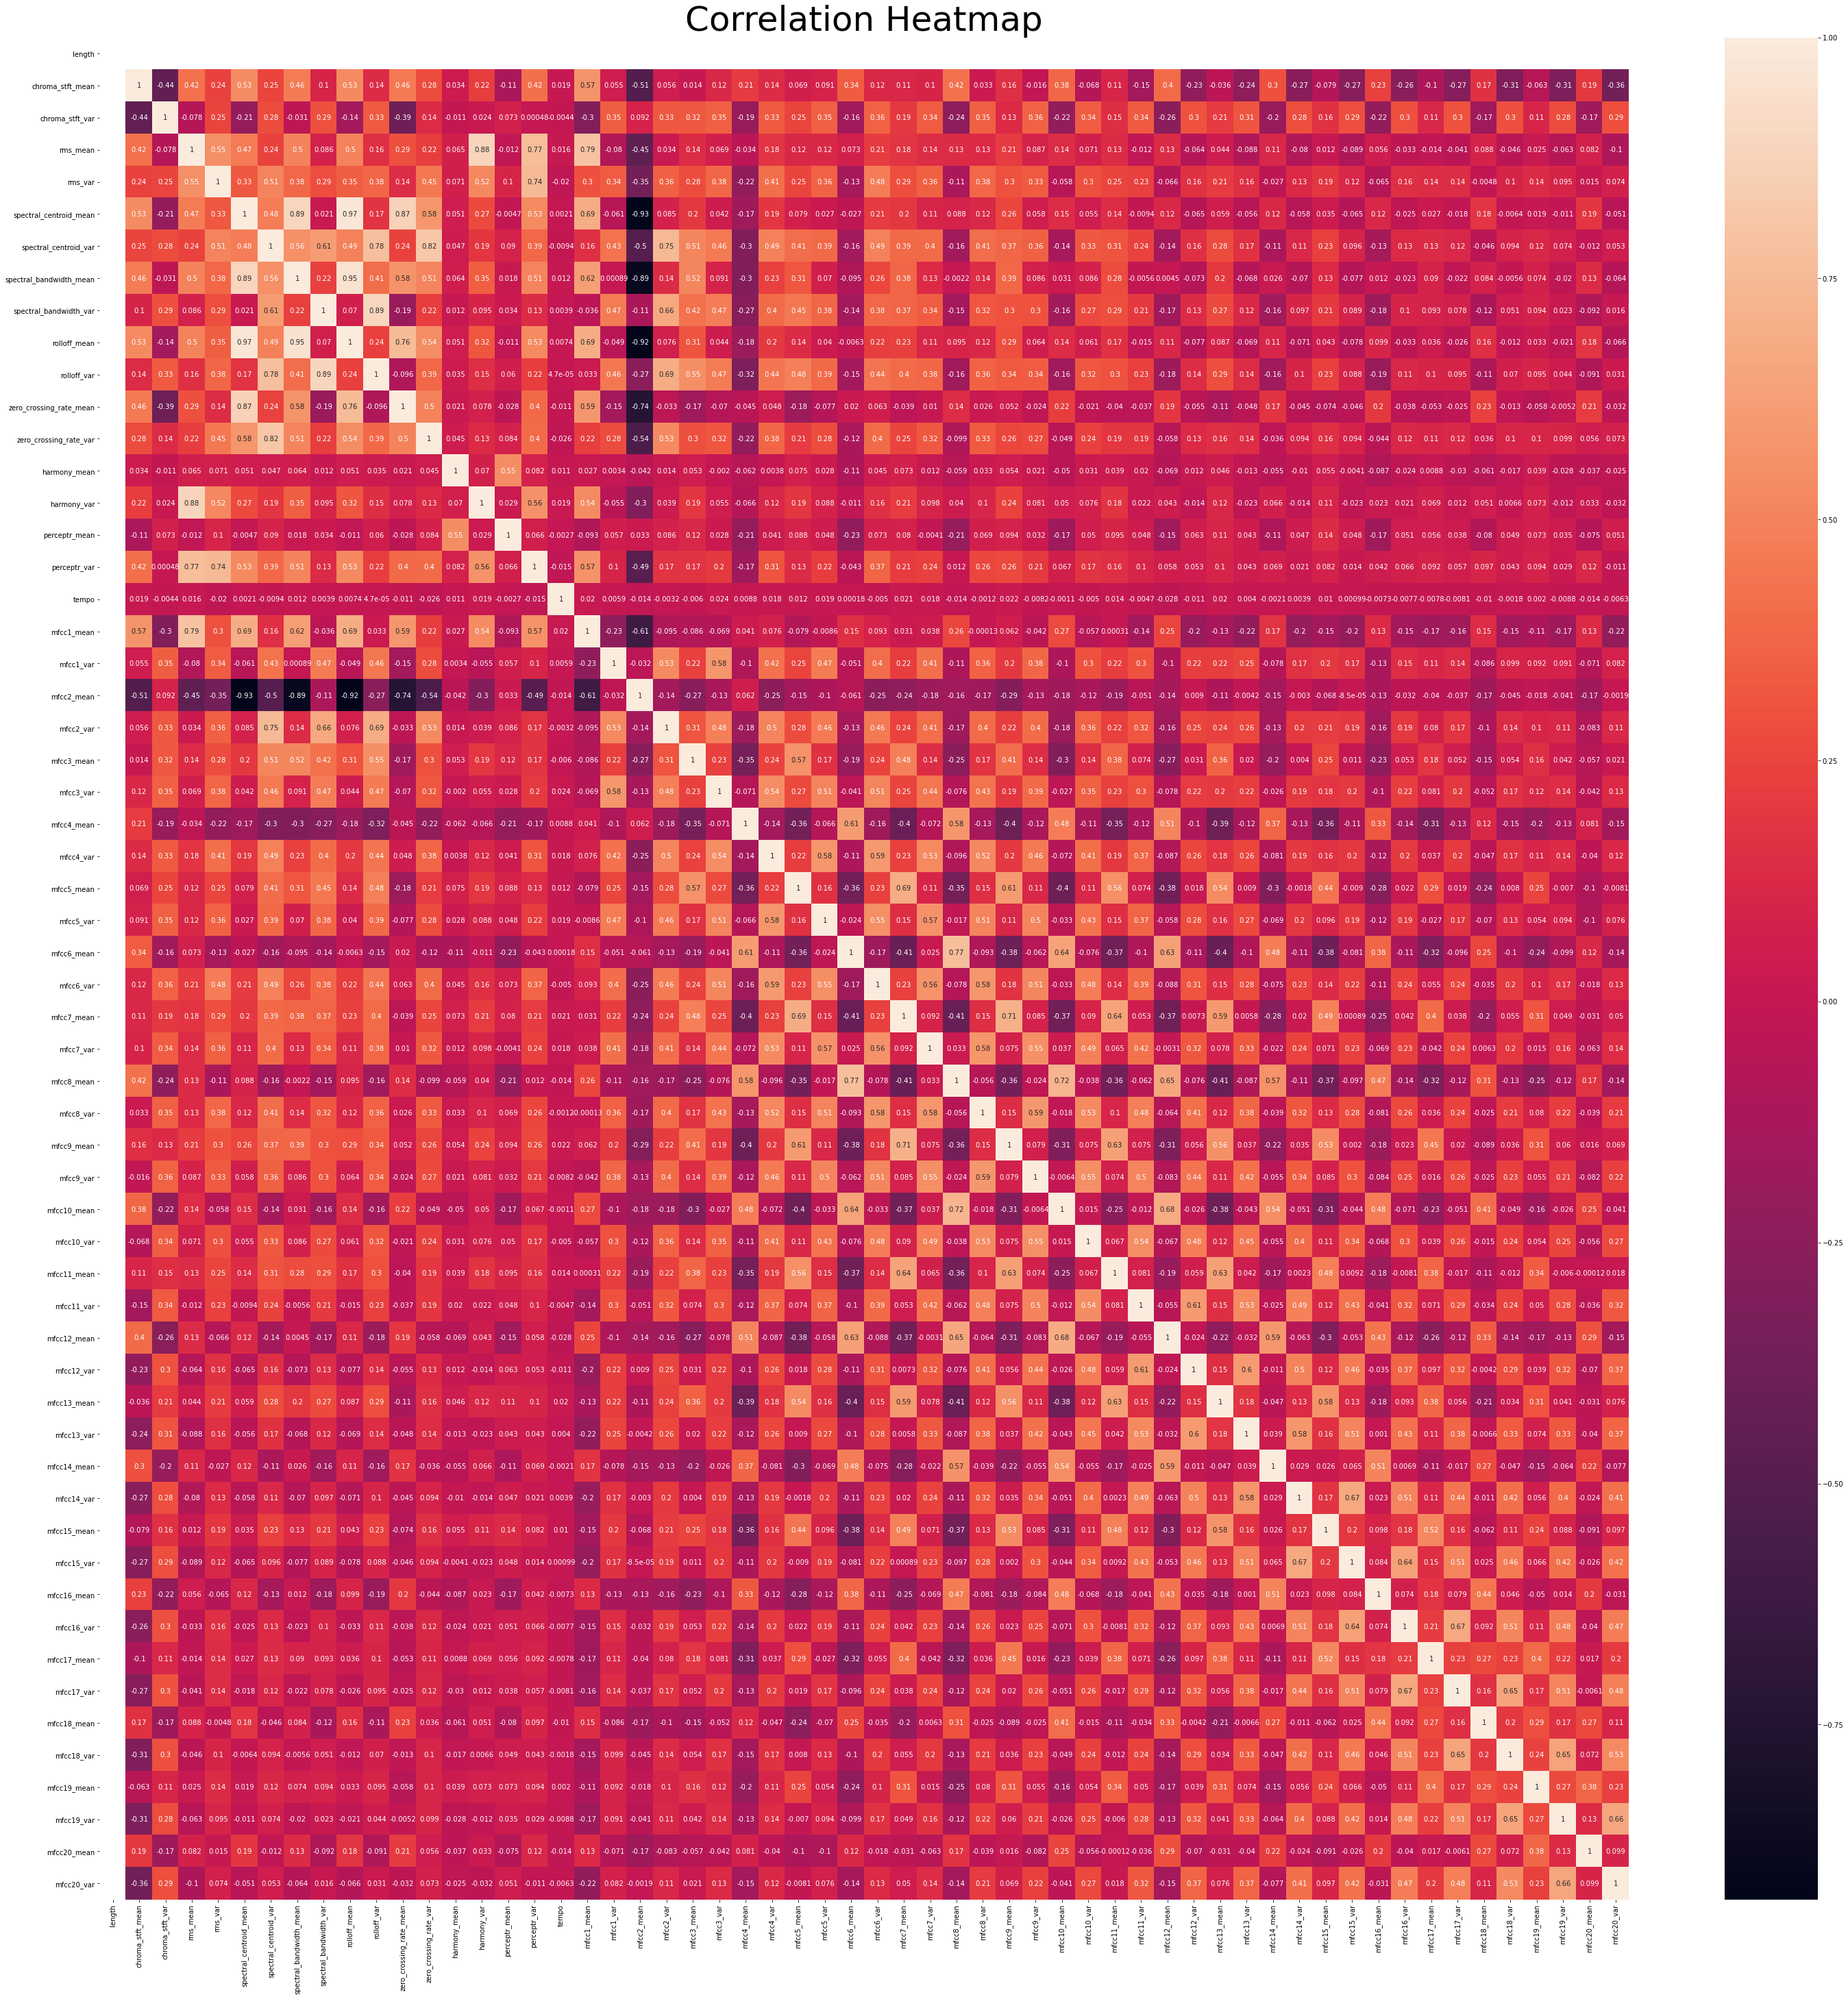

In [17]:
#print heatmap matrix
fig=plt.figure(figsize=(50,50))

# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(cor, dtype=np.bool))

sns.heatmap(cor,  annot=True)
plt.title('Correlation Heatmap', fontsize = 50)
plt.savefig("Corr Heatmap.jpg")

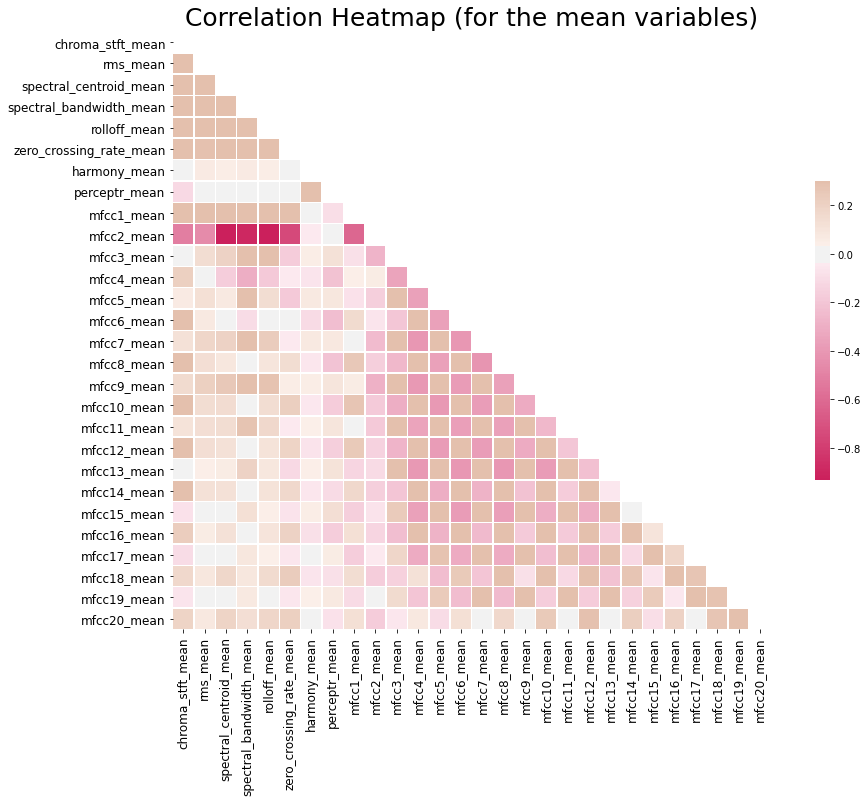

In [18]:
# Computing the Correlation Matrix
spike_cols = [col for col in df.columns if 'mean' in col]
corr = df[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the mean variables)', fontsize = 25)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);
#plt.savefig("Corr Heatmap.jpg")

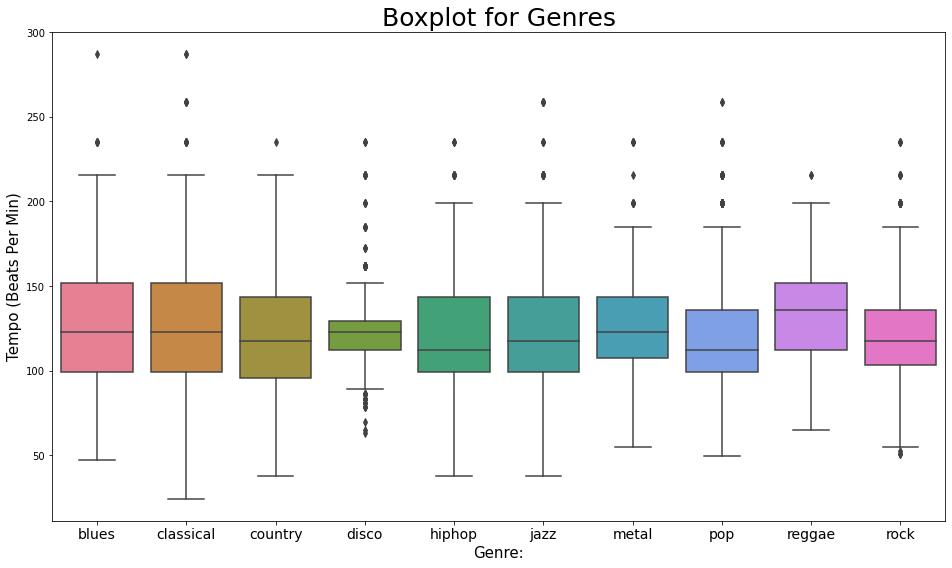

In [19]:
x = df[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre:", fontsize = 15)
plt.ylabel("Tempo (Beats Per Min)", fontsize = 15)
plt.savefig("Boxplot.jpg")

In [10]:
location = 'C:/Users/Admin/Desktop/ML Project/Datasets/Train_Data'
print(list(os.listdir(f'{location}')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [13]:
os.makedirs('C:/Users/Admin/Desktop/ML Project/Datasets/spectrograms3sec')
os.makedirs('C:/Users/Admin/Desktop/ML Project/Datasets/spectrograms3sec/train')
os.makedirs('C:/Users/Admin/Desktop/ML Project/Datasets/spectrograms3sec/test')

In [19]:
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'
genres = genres.split()

In [21]:
for g in genres:
  path_audio = os.path.join('C:/Users/Admin/Desktop/ML Project/Datasets/audio3sec',f'{g}')
  os.makedirs(path_audio)
  path_train = os.path.join('C:/Users/Admin/Desktop/ML Project/Datasets/spectrograms3sec/train',f'{g}')
  path_test = os.path.join('C:/Users/Admin/Desktop/ML Project/Datasets/spectrograms3sec/test',f'{g}')
  os. makedirs(path_train)
  os. makedirs(path_test)

In [22]:
from pydub import AudioSegment
i = 0
for g in genres:
  j=0
  print(f"{g}")
  for filename in os.listdir(os.path.join('C:/Users/Admin/Desktop/ML Project/Datasets/genres/',f"{g}")):

    song  =  os.path.join(f'C:/Users/Admin/Desktop/ML Project/Datasets/genres/{g}',f'{filename}')
    j = j+1
    for w in range(0,10):
      i = i+1
      #pydub calculates in milliseconds so we multiply the values by 1000
      t1 = 3*(w)*1000
      t2 = 3*(w+1)*1000
      newAudio = AudioSegment.from_wav(song)
      new = newAudio[t1:t2]
      new.export(f'C:/Users/Admin/Desktop/ML Project/Datasets/audio3sec/{g}/{g+str(j)+str(w)}.wav', format="wav")

blues
classical
country
disco
hiphop
jazz
metal
pop
reggae
rock


In [ ]:
for g in genres:
  j = 10
  print(g)
  for filename in os.listdir(os.path.join('C:/Users/Admin/Desktop/ML Project/Datasets/audio3sec',f"{g}")):
    song  =  os.path.join(f'C:/Users/Admin/Desktop/ML Project/Datasets/audio3sec/{g}',f'{filename}')
    y,sr = librosa.load(song,duration=3)
    #print(sr)
    mels = librosa.feature.melspectrogram(y=y,sr=sr)
    fig = plt.Figure()
    canvas = FigureCanvas(fig)
    p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
    melspecname=(f'C:/Users/Admin/Desktop/ML Project/Datasets/spectrograms3sec/train/{g}/{g+str(j)}')
    plt.savefig(f'{melspecname}.png', format="png")
    j = j+1

blues


In [23]:
directory = "C:/Users/Admin/Desktop/ML Project/Datasets/spectrograms3sec/train/"
for g in genres:
  filenames = os.listdir(os.path.join(directory,f"{g}"))
  random.shuffle(filenames)
  test_files = filenames[0:100]

  for f in test_files:
    shutil.move(directory + f"{g}"+ "/" + f,"C:/Users/Admin/Desktop/ML Project/Datasets/spectrograms3sec/test/" + f"{g}")

In [20]:
#Understanding Audio
# Importing 1 file
y, sr = librosa.load(f'{location}/classical/classical.00024.wav')

print('y: ', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', 661794/22050)

y:  [-0.03775024 -0.07223511 -0.08242798 ...  0.02264404  0.00308228
 -0.0105896 ] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


In [21]:
df=df.drop(labels="filename",axis=1)

In [22]:
audio_recording="C:/Users/Admin/Desktop/ML Project/Datasets/Train_Data/classical/classical.00024.wav"
data,sr=librosa.load(audio_recording)
print(type(data),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [23]:
librosa.load(audio_recording,sr)

(array([-0.03775024, -0.07223511, -0.08242798, ...,  0.02264404,
         0.00308228, -0.0105896 ], dtype=float32),
 22050)

# Playing Audio

In [24]:
import IPython
IPython.display.Audio(data,rate=sr)

# Waveforms
Waveforms are visual representations of sound as time on the x-axis and amplitude on the y-axis. 
They are great for allowing us to quickly scan the audio data and visually compare and contrast which genres might be more similar than others.

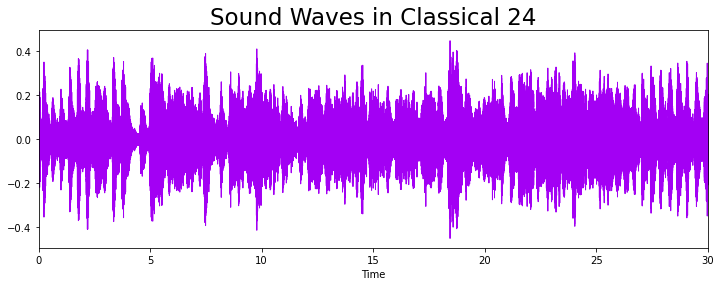

In [25]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(data,color="#A300F4")
plt.title("Sound Waves in Classical 24", fontsize = 23);
plt.show()

# MFCC
The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10-20) that concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.
librosa.feature.mfcc computes MFCCs across an audio signal:

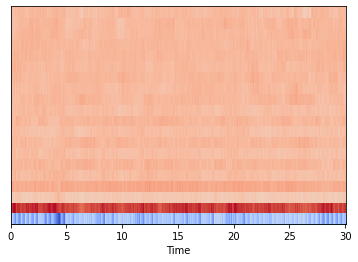

In [26]:
#using classical.00024.wav to display its MFCC
x, fs = librosa.load("C:/Users/Admin/Desktop/ML Project/Datasets/Train_Data/classical/classical.00024.wav")
librosa.display.waveplot(x, sr=sr)
mfccs = librosa.feature.mfcc(x, sr=fs)
(13, 97)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

# Spectrogram
A spectrogram is a visual way of representing the signal loudness of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.
Spectrograms are sometimes called sonographs, voiceprints, or voicegrams. When the data is represented in a 3D plot, they may be called waterfalls. In 2-dimensional arrays, the first axis is frequency while the second axis is time

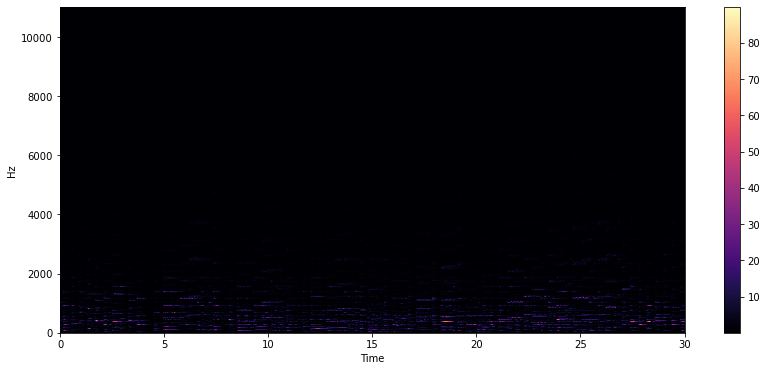

In [27]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

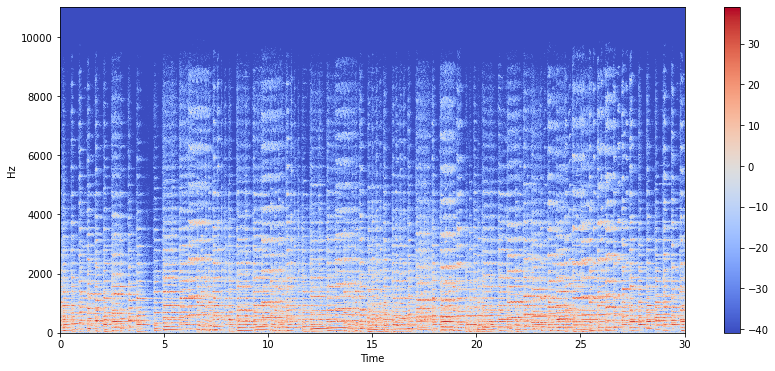

In [28]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

# Spectral Rolloff
Spectral Rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies
librosa.feature.spectral_rolloff computes the rolloff frequency for each frame in a signal.

The roll-off frequency denotes the approximate low bass and high treble limits in a frequency response curve, with all frequencies between being those a speaker will play accurately

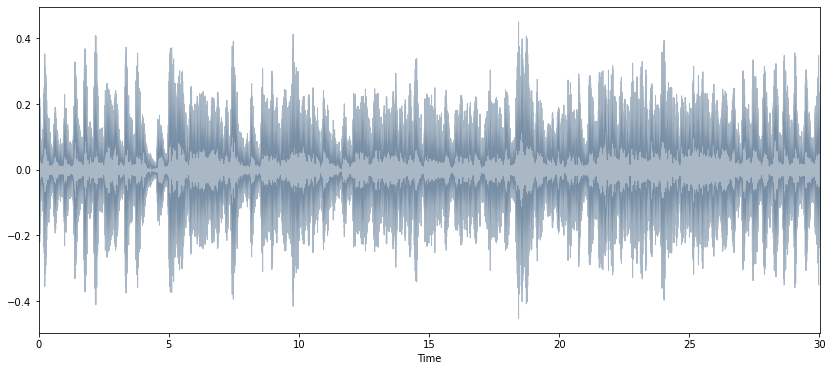

In [29]:
spectral_rolloff=librosa.feature.spectral_rolloff(data+0.01,sr=sr)[0]
plt.figure(figsize=(14,6))
librosa.display.waveplot(data,sr=sr,alpha=0.4,color="#2B4F72")

# Chroma Feature
It's a useful tool for studying musical aspects whose pitches may be classified and whose tuning is close to the equal-tempered scale. Chromatic and melodic aspects of music are captured by chroma features, which are resistant to changes in timbre and instrumentation.

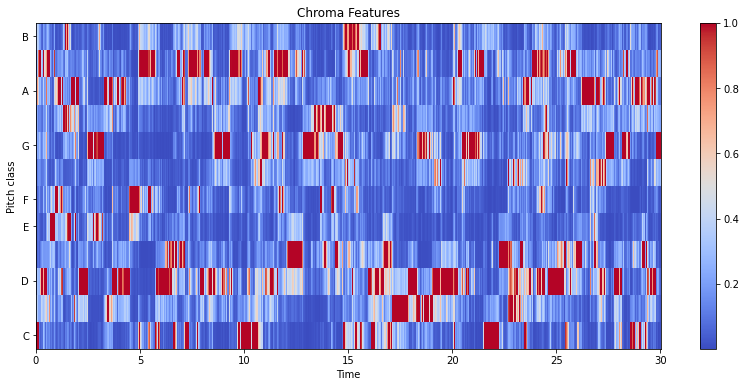

In [30]:
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(data,sr=sr)
plt.figure(figsize=(14,6))
lplt.specshow(chroma,sr=sr,x_axis="time",y_axis="chroma",cmap="coolwarm")
plt.colorbar()
plt.title("Chroma Features")
plt.show()

# Zero Crossing
Zero crossing is said to occur if successive samples have different algebraic signs. The rate at which zero-crossings occur is a simple measure of the frequency content of a signal. Zero-crossing rate is a measure of the number of times in a given time interval/frame that the amplitude of the speech signals passes through a value of zero.

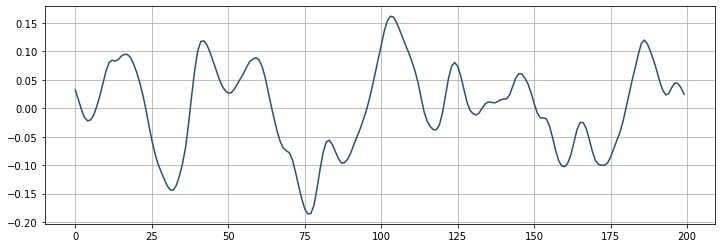

In [31]:
start=1000
end=1200
plt.figure(figsize=(12,4))
plt.plot(data[start:end],color="#2B4F72")
plt.grid()

In [32]:
zero_cross_rate=librosa.zero_crossings(data[start:end],pad=False)
print("the number of zero_crossings is :", sum(zero_cross_rate))

the number of zero_crossings is : 12


# Feature Extraction

In [33]:
class_list=df.iloc[:,-1]
converter=LabelEncoder()

In [34]:
y=converter.fit_transform(class_list)
y

array([0, 0, 0, ..., 9, 9, 9])

In [35]:
print(df.iloc[:,:-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

# Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
X=fit.fit_transform(np.array(df.iloc[:,:-1],dtype=float))

# Spliting Dataset into 80:20 

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [38]:
len(y_test)

1998

In [39]:
len(y_train)

7992

 # Building the model

In [40]:
from tensorflow.keras.models import Sequential

In [41]:
def trainModel(model,epochs,optimizer):
    batch_size=64
    
    # We are using this crossentropy loss function since there are two or more label classes. 
    # We expect labels to be provided as integers. To provide labels using one-hot representation, 
    # CategoricalCrossentropy loss is used. There should be n classes floating point values per feature for 
    # y_pred and a single floating point value per feature for y_true.
    
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics='accuracy')
    return model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size)

In [42]:
def plotValidate(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [73]:
def plot_history(hist):
    plt.figure(figsize=(20,15))
    fig, axs = plt.subplots(2)
    fig.tight_layout(pad=2.0)
    
    # accuracy subplot
    axs[0].plot(hist.history["accuracy"], label="train accuracy")
    axs[0].plot(hist.history["val_accuracy"], label="test accuracy")    
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    
    # Error subplot
    axs[1].plot(hist.history["loss"], label="train error")
    axs[1].plot(hist.history["val_loss"], label="test error")    
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()

In [44]:
import tensorflow as tf

# Layers of CNN
All of the hidden layers are using the RELU activation function and the output layer uses the softmax function. The loss is calculated using the sparse_categorical_crossentropy function. Dropout is used to prevent overfitting. We chose the Adam optimizer because it gave us the best results after evaluating other optimizers. The model accuracy can be increased by further increasing the epochs but after a certain period, we may achieve a threshold, so the value should be determined accordingly.

In [45]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(256,activation='relu',input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.7),
    
    tf.keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.7),
    
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.7),
    
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.7),
    
    tf.keras.layers.Dense(10,activation='softmax'),
])

print(model.summary())
model_history=trainModel(model=model,epochs=600,optimizer='adam')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               15104     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2

Epoch 104/600
125/125 [==============================] - 0s 2ms/step - loss: 1.3259 - accuracy: 0.4884 - val_loss: 1.1251 - val_accuracy: 0.6001
Epoch 105/600
125/125 [==============================] - 0s 2ms/step - loss: 1.3038 - accuracy: 0.5009 - val_loss: 1.0987 - val_accuracy: 0.6001
Epoch 106/600
125/125 [==============================] - 0s 2ms/step - loss: 1.3197 - accuracy: 0.4906 - val_loss: 1.1102 - val_accuracy: 0.6006
Epoch 107/600
125/125 [==============================] - 0s 3ms/step - loss: 1.3036 - accuracy: 0.5064 - val_loss: 1.1096 - val_accuracy: 0.6036
Epoch 108/600
125/125 [==============================] - 0s 2ms/step - loss: 1.3073 - accuracy: 0.4996 - val_loss: 1.1055 - val_accuracy: 0.6001
Epoch 109/600
125/125 [==============================] - 0s 3ms/step - loss: 1.3005 - accuracy: 0.4899 - val_loss: 1.1157 - val_accuracy: 0.6071
Epoch 110/600
125/125 [==============================] - 0s 2ms/step - loss: 1.3153 - accuracy: 0.4952 - val_loss: 1.1239 - val_ac

125/125 [==============================] - 0s 2ms/step - loss: 1.2029 - accuracy: 0.5638 - val_loss: 1.0027 - val_accuracy: 0.6687
Epoch 217/600
125/125 [==============================] - 0s 2ms/step - loss: 1.1935 - accuracy: 0.5641 - val_loss: 1.0307 - val_accuracy: 0.6652
Epoch 218/600
125/125 [==============================] - 0s 2ms/step - loss: 1.2035 - accuracy: 0.5657 - val_loss: 1.0320 - val_accuracy: 0.6647
Epoch 219/600
125/125 [==============================] - 0s 2ms/step - loss: 1.1812 - accuracy: 0.5668 - val_loss: 1.0263 - val_accuracy: 0.6697
Epoch 220/600
125/125 [==============================] - 0s 2ms/step - loss: 1.1812 - accuracy: 0.5677 - val_loss: 1.0361 - val_accuracy: 0.6687
Epoch 221/600
125/125 [==============================] - 0s 2ms/step - loss: 1.1779 - accuracy: 0.5647 - val_loss: 1.0412 - val_accuracy: 0.6642
Epoch 222/600
125/125 [==============================] - 0s 2ms/step - loss: 1.2002 - accuracy: 0.5576 - val_loss: 1.0258 - val_accuracy: 0.6637

125/125 [==============================] - 0s 2ms/step - loss: 1.1506 - accuracy: 0.5842 - val_loss: 1.0077 - val_accuracy: 0.6852
Epoch 329/600
125/125 [==============================] - 0s 2ms/step - loss: 1.2101 - accuracy: 0.5892 - val_loss: 0.9990 - val_accuracy: 0.6942
Epoch 330/600
125/125 [==============================] - 0s 2ms/step - loss: 1.1734 - accuracy: 0.5813 - val_loss: 0.9979 - val_accuracy: 0.7002
Epoch 331/600
125/125 [==============================] - 0s 2ms/step - loss: 1.1340 - accuracy: 0.5963 - val_loss: 0.9838 - val_accuracy: 0.6972
Epoch 332/600
125/125 [==============================] - 0s 2ms/step - loss: 1.1337 - accuracy: 0.5942 - val_loss: 0.9870 - val_accuracy: 0.6927
Epoch 333/600
125/125 [==============================] - 0s 2ms/step - loss: 1.1309 - accuracy: 0.5927 - val_loss: 1.0021 - val_accuracy: 0.6917
Epoch 334/600
125/125 [==============================] - 0s 2ms/step - loss: 1.1593 - accuracy: 0.5898 - val_loss: 1.0102 - val_accuracy: 0.6977

125/125 [==============================] - 0s 3ms/step - loss: 1.1271 - accuracy: 0.6036 - val_loss: 0.9693 - val_accuracy: 0.6992
Epoch 441/600
125/125 [==============================] - 0s 2ms/step - loss: 1.1252 - accuracy: 0.5970 - val_loss: 0.9825 - val_accuracy: 0.7042
Epoch 442/600
125/125 [==============================] - 0s 2ms/step - loss: 1.1480 - accuracy: 0.5973 - val_loss: 0.9873 - val_accuracy: 0.7057
Epoch 443/600
125/125 [==============================] - 0s 2ms/step - loss: 1.1216 - accuracy: 0.6021 - val_loss: 1.0036 - val_accuracy: 0.7027
Epoch 444/600
125/125 [==============================] - 0s 2ms/step - loss: 1.1210 - accuracy: 0.6037 - val_loss: 0.9748 - val_accuracy: 0.6987
Epoch 445/600
125/125 [==============================] - 0s 2ms/step - loss: 1.1267 - accuracy: 0.6047 - val_loss: 0.9723 - val_accuracy: 0.7027
Epoch 446/600
125/125 [==============================] - 0s 2ms/step - loss: 1.1336 - accuracy: 0.6006 - val_loss: 0.9714 - val_accuracy: 0.7077

125/125 [==============================] - 0s 2ms/step - loss: 1.0802 - accuracy: 0.6161 - val_loss: 0.9829 - val_accuracy: 0.7072
Epoch 553/600
125/125 [==============================] - 0s 2ms/step - loss: 1.0942 - accuracy: 0.6174 - val_loss: 0.9773 - val_accuracy: 0.7012
Epoch 554/600
125/125 [==============================] - 0s 2ms/step - loss: 1.1014 - accuracy: 0.6170 - val_loss: 0.9943 - val_accuracy: 0.7007
Epoch 555/600
125/125 [==============================] - 0s 2ms/step - loss: 1.0822 - accuracy: 0.6200 - val_loss: 0.9827 - val_accuracy: 0.7042
Epoch 556/600
125/125 [==============================] - 0s 2ms/step - loss: 1.0899 - accuracy: 0.6139 - val_loss: 1.0009 - val_accuracy: 0.7092
Epoch 557/600
125/125 [==============================] - 0s 2ms/step - loss: 1.0965 - accuracy: 0.6167 - val_loss: 1.0161 - val_accuracy: 0.7107
Epoch 558/600
125/125 [==============================] - 0s 2ms/step - loss: 1.0894 - accuracy: 0.6147 - val_loss: 1.0017 - val_accuracy: 0.7067

Validation Accuracy 0.7207207083702087


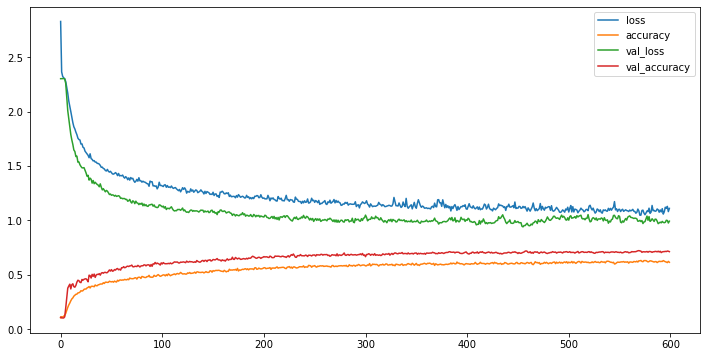

In [46]:
plotValidate(model_history)

<Figure size 1440x1080 with 0 Axes>

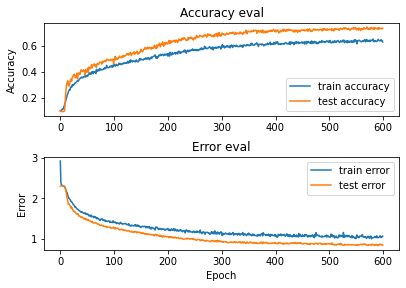

In [74]:
plot_history(model_history)

# Model Evaluation

In [48]:
test_loss,test_acc=model.evaluate(X_test,y_test,batch_size=64)
print("Test loss :  ",test_loss)
print("Best Accuracy : ",test_acc*100)

32/32 [==============================] - 0s 1ms/step - loss: 0.9916 - accuracy: 0.7112
Test loss :   0.9916106462478638
Best Accuracy :  71.12112045288086


Since the accuracy of the model is good but not sufficienct, we will further split the model into 70:30 to try to obtain a higher accuracy

# Spliting Dataset into 70:30 

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [50]:
len(y_test)

2997

In [51]:
len(y_train)

6993

In [52]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(256,activation='relu',input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.7),
    
    tf.keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.7),
    
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.7),
    
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.7),
    
    tf.keras.layers.Dense(10,activation='softmax'),
])

print(model.summary())
model_history=trainModel(model=model,epochs=600,optimizer='adam')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               15104     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)               

Epoch 104/600
110/110 [==============================] - 0s 3ms/step - loss: 1.2948 - accuracy: 0.5029 - val_loss: 1.1193 - val_accuracy: 0.6223
Epoch 105/600
110/110 [==============================] - 0s 3ms/step - loss: 1.3032 - accuracy: 0.5109 - val_loss: 1.1188 - val_accuracy: 0.6216
Epoch 106/600
110/110 [==============================] - 0s 3ms/step - loss: 1.3106 - accuracy: 0.5115 - val_loss: 1.1193 - val_accuracy: 0.6260
Epoch 107/600
110/110 [==============================] - 0s 2ms/step - loss: 1.2974 - accuracy: 0.5084 - val_loss: 1.1199 - val_accuracy: 0.6236
Epoch 108/600
110/110 [==============================] - 0s 2ms/step - loss: 1.2927 - accuracy: 0.4995 - val_loss: 1.1140 - val_accuracy: 0.6246
Epoch 109/600
110/110 [==============================] - 0s 2ms/step - loss: 1.3272 - accuracy: 0.4979 - val_loss: 1.1241 - val_accuracy: 0.6230
Epoch 110/600
110/110 [==============================] - 0s 3ms/step - loss: 1.3068 - accuracy: 0.5151 - val_loss: 1.1124 - val_ac

110/110 [==============================] - 0s 4ms/step - loss: 1.1528 - accuracy: 0.5985 - val_loss: 0.9970 - val_accuracy: 0.6927
Epoch 217/600
110/110 [==============================] - 0s 4ms/step - loss: 1.1552 - accuracy: 0.5932 - val_loss: 0.9834 - val_accuracy: 0.7107
Epoch 218/600
110/110 [==============================] - 1s 6ms/step - loss: 1.1561 - accuracy: 0.5957 - val_loss: 0.9755 - val_accuracy: 0.7090
Epoch 219/600
110/110 [==============================] - 1s 6ms/step - loss: 1.1496 - accuracy: 0.5997 - val_loss: 0.9868 - val_accuracy: 0.7037
Epoch 220/600
110/110 [==============================] - 0s 4ms/step - loss: 1.1508 - accuracy: 0.5960 - val_loss: 0.9791 - val_accuracy: 0.7080
Epoch 221/600
110/110 [==============================] - 0s 4ms/step - loss: 1.1338 - accuracy: 0.5926 - val_loss: 0.9872 - val_accuracy: 0.7077
Epoch 222/600
110/110 [==============================] - 0s 4ms/step - loss: 1.1635 - accuracy: 0.5904 - val_loss: 0.9924 - val_accuracy: 0.7004

110/110 [==============================] - 0s 3ms/step - loss: 1.1090 - accuracy: 0.6192 - val_loss: 0.9516 - val_accuracy: 0.7344
Epoch 329/600
110/110 [==============================] - 0s 3ms/step - loss: 1.0996 - accuracy: 0.6246 - val_loss: 0.9272 - val_accuracy: 0.7371
Epoch 330/600
110/110 [==============================] - 0s 3ms/step - loss: 1.1103 - accuracy: 0.6136 - val_loss: 0.9270 - val_accuracy: 0.7421
Epoch 331/600
110/110 [==============================] - 0s 3ms/step - loss: 1.1127 - accuracy: 0.6162 - val_loss: 0.9382 - val_accuracy: 0.7341
Epoch 332/600
110/110 [==============================] - 0s 3ms/step - loss: 1.0785 - accuracy: 0.6262 - val_loss: 0.9330 - val_accuracy: 0.7364
Epoch 333/600
110/110 [==============================] - 0s 4ms/step - loss: 1.1038 - accuracy: 0.6192 - val_loss: 0.9355 - val_accuracy: 0.7377
Epoch 334/600
110/110 [==============================] - 0s 3ms/step - loss: 1.0761 - accuracy: 0.6285 - val_loss: 0.9355 - val_accuracy: 0.7367

110/110 [==============================] - 0s 3ms/step - loss: 1.0553 - accuracy: 0.6485 - val_loss: 0.9319 - val_accuracy: 0.7528
Epoch 441/600
110/110 [==============================] - 0s 3ms/step - loss: 1.0422 - accuracy: 0.6379 - val_loss: 0.9256 - val_accuracy: 0.7508
Epoch 442/600
110/110 [==============================] - 0s 3ms/step - loss: 1.0611 - accuracy: 0.6375 - val_loss: 0.9261 - val_accuracy: 0.7524
Epoch 443/600
110/110 [==============================] - 0s 3ms/step - loss: 1.0413 - accuracy: 0.6429 - val_loss: 0.9031 - val_accuracy: 0.7524
Epoch 444/600
110/110 [==============================] - 0s 2ms/step - loss: 1.0712 - accuracy: 0.6545 - val_loss: 0.9353 - val_accuracy: 0.7508
Epoch 445/600
110/110 [==============================] - 0s 3ms/step - loss: 1.0698 - accuracy: 0.6374 - val_loss: 0.9406 - val_accuracy: 0.7464
Epoch 446/600
110/110 [==============================] - 0s 3ms/step - loss: 1.0517 - accuracy: 0.6419 - val_loss: 0.9513 - val_accuracy: 0.7484

110/110 [==============================] - 0s 3ms/step - loss: 1.0216 - accuracy: 0.6515 - val_loss: 0.9980 - val_accuracy: 0.7631
Epoch 553/600
110/110 [==============================] - 0s 2ms/step - loss: 1.0165 - accuracy: 0.6574 - val_loss: 1.0054 - val_accuracy: 0.7571
Epoch 554/600
110/110 [==============================] - 0s 2ms/step - loss: 1.0307 - accuracy: 0.6492 - val_loss: 1.0124 - val_accuracy: 0.7571
Epoch 555/600
110/110 [==============================] - 0s 2ms/step - loss: 1.0410 - accuracy: 0.6634 - val_loss: 1.0132 - val_accuracy: 0.7578
Epoch 556/600
110/110 [==============================] - 0s 2ms/step - loss: 1.0237 - accuracy: 0.6572 - val_loss: 1.0484 - val_accuracy: 0.7591
Epoch 557/600
110/110 [==============================] - 0s 2ms/step - loss: 1.0102 - accuracy: 0.6518 - val_loss: 1.0142 - val_accuracy: 0.7558
Epoch 558/600
110/110 [==============================] - 0s 2ms/step - loss: 1.0227 - accuracy: 0.6585 - val_loss: 1.0179 - val_accuracy: 0.7578

Validation Accuracy 0.7724391222000122


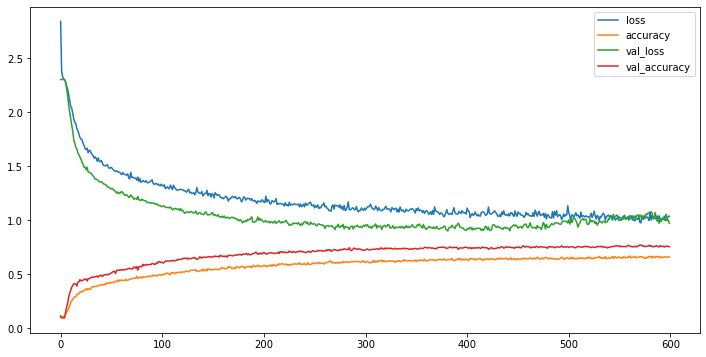

In [53]:
plotValidate(model_history)

<Figure size 1440x1080 with 0 Axes>

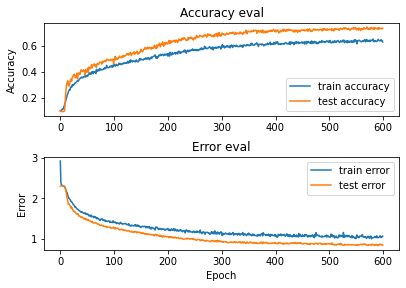

In [75]:
plot_history(model_history)

In [55]:
test_loss,test_acc=model.evaluate(X_test,y_test,batch_size=64)
print("Test loss :  ",test_loss)
print("Best Accuracy : ",test_acc*100)

47/47 [==============================] - 0s 955us/step - loss: 0.9718 - accuracy: 0.7548
Test loss :   0.9718406796455383
Best Accuracy :  75.47547817230225


# Spliting Dataset into 60:40 


In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

In [57]:
len(y_test)

3996

In [58]:
len(y_train)

5994

In [59]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(256,activation='relu',input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.7),
    
    tf.keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.7),
    
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.7),
    
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.7),
    
    tf.keras.layers.Dense(10,activation='softmax'),
])

print(model.summary())
model_history=trainModel(model=model,epochs=600,optimizer='adam')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               15104     
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)               

Epoch 48/600
94/94 [==============================] - 0s 3ms/step - loss: 1.6128 - accuracy: 0.3604 - val_loss: 1.4765 - val_accuracy: 0.4177
Epoch 49/600
94/94 [==============================] - 0s 3ms/step - loss: 1.6302 - accuracy: 0.3704 - val_loss: 1.4990 - val_accuracy: 0.3971
Epoch 50/600
94/94 [==============================] - 0s 3ms/step - loss: 1.6130 - accuracy: 0.3712 - val_loss: 1.4772 - val_accuracy: 0.4067
Epoch 51/600
94/94 [==============================] - 0s 3ms/step - loss: 1.6105 - accuracy: 0.3725 - val_loss: 1.4791 - val_accuracy: 0.4117
Epoch 52/600
94/94 [==============================] - 0s 3ms/step - loss: 1.6195 - accuracy: 0.3675 - val_loss: 1.4604 - val_accuracy: 0.4292
Epoch 53/600
94/94 [==============================] - 0s 3ms/step - loss: 1.5894 - accuracy: 0.3820 - val_loss: 1.4829 - val_accuracy: 0.3944
Epoch 54/600
94/94 [==============================] - 0s 3ms/step - loss: 1.5699 - accuracy: 0.3841 - val_loss: 1.4563 - val_accuracy: 0.4372
Epoch 

94/94 [==============================] - 0s 3ms/step - loss: 1.3096 - accuracy: 0.4965 - val_loss: 1.1256 - val_accuracy: 0.5771
Epoch 163/600
94/94 [==============================] - 0s 3ms/step - loss: 1.2982 - accuracy: 0.5060 - val_loss: 1.1124 - val_accuracy: 0.5896
Epoch 164/600
94/94 [==============================] - 0s 3ms/step - loss: 1.2749 - accuracy: 0.5075 - val_loss: 1.1255 - val_accuracy: 0.5778
Epoch 165/600
94/94 [==============================] - 0s 3ms/step - loss: 1.2970 - accuracy: 0.5100 - val_loss: 1.1186 - val_accuracy: 0.5796
Epoch 166/600
94/94 [==============================] - 0s 3ms/step - loss: 1.2872 - accuracy: 0.4950 - val_loss: 1.1128 - val_accuracy: 0.5861
Epoch 167/600
94/94 [==============================] - 0s 3ms/step - loss: 1.3031 - accuracy: 0.4952 - val_loss: 1.1214 - val_accuracy: 0.5861
Epoch 168/600
94/94 [==============================] - 0s 3ms/step - loss: 1.2557 - accuracy: 0.5045 - val_loss: 1.1122 - val_accuracy: 0.5881
Epoch 169/600

94/94 [==============================] - 0s 3ms/step - loss: 1.2315 - accuracy: 0.5379 - val_loss: 1.0367 - val_accuracy: 0.6246
Epoch 220/600
94/94 [==============================] - 0s 3ms/step - loss: 1.1966 - accuracy: 0.5571 - val_loss: 1.0411 - val_accuracy: 0.6386
Epoch 221/600
94/94 [==============================] - 0s 3ms/step - loss: 1.1939 - accuracy: 0.5572 - val_loss: 1.0154 - val_accuracy: 0.6522
Epoch 222/600
94/94 [==============================] - 0s 3ms/step - loss: 1.2066 - accuracy: 0.5579 - val_loss: 1.0167 - val_accuracy: 0.6406
Epoch 223/600
94/94 [==============================] - 0s 4ms/step - loss: 1.2262 - accuracy: 0.5439 - val_loss: 1.0143 - val_accuracy: 0.6489
Epoch 224/600
94/94 [==============================] - 0s 3ms/step - loss: 1.2097 - accuracy: 0.5519 - val_loss: 1.0122 - val_accuracy: 0.6416
Epoch 225/600
94/94 [==============================] - 0s 3ms/step - loss: 1.2274 - accuracy: 0.5440 - val_loss: 1.0237 - val_accuracy: 0.6399
Epoch 226/600

94/94 [==============================] - 0s 3ms/step - loss: 1.1419 - accuracy: 0.5926 - val_loss: 0.9256 - val_accuracy: 0.6917
Epoch 334/600
94/94 [==============================] - 0s 3ms/step - loss: 1.1181 - accuracy: 0.5963 - val_loss: 0.9337 - val_accuracy: 0.6974
Epoch 335/600
94/94 [==============================] - 0s 2ms/step - loss: 1.0964 - accuracy: 0.6036 - val_loss: 0.9137 - val_accuracy: 0.7065
Epoch 336/600
94/94 [==============================] - 0s 3ms/step - loss: 1.1269 - accuracy: 0.6013 - val_loss: 0.9287 - val_accuracy: 0.6947
Epoch 337/600
94/94 [==============================] - 0s 3ms/step - loss: 1.1219 - accuracy: 0.5936 - val_loss: 0.9084 - val_accuracy: 0.6997
Epoch 338/600
94/94 [==============================] - 0s 3ms/step - loss: 1.1279 - accuracy: 0.5976 - val_loss: 0.9039 - val_accuracy: 0.6954
Epoch 339/600
94/94 [==============================] - 0s 3ms/step - loss: 1.1247 - accuracy: 0.6024 - val_loss: 0.9310 - val_accuracy: 0.6924
Epoch 340/600

94/94 [==============================] - 0s 3ms/step - loss: 1.1143 - accuracy: 0.6230 - val_loss: 0.9098 - val_accuracy: 0.7085
Epoch 448/600
94/94 [==============================] - 0s 3ms/step - loss: 1.0703 - accuracy: 0.6235 - val_loss: 0.8911 - val_accuracy: 0.7200
Epoch 449/600
94/94 [==============================] - 0s 3ms/step - loss: 1.0726 - accuracy: 0.6243 - val_loss: 0.8979 - val_accuracy: 0.7207
Epoch 450/600
94/94 [==============================] - 0s 3ms/step - loss: 1.0633 - accuracy: 0.6306 - val_loss: 0.8843 - val_accuracy: 0.7220
Epoch 451/600
94/94 [==============================] - 0s 3ms/step - loss: 1.1049 - accuracy: 0.6203 - val_loss: 0.8859 - val_accuracy: 0.7185
Epoch 452/600
94/94 [==============================] - 0s 3ms/step - loss: 1.0741 - accuracy: 0.6213 - val_loss: 0.8813 - val_accuracy: 0.7170
Epoch 453/600
94/94 [==============================] - 0s 3ms/step - loss: 1.0716 - accuracy: 0.6276 - val_loss: 0.8852 - val_accuracy: 0.7222
Epoch 454/600

94/94 [==============================] - 0s 3ms/step - loss: 1.0679 - accuracy: 0.6338 - val_loss: 0.8658 - val_accuracy: 0.7267
Epoch 562/600
94/94 [==============================] - 0s 3ms/step - loss: 1.1115 - accuracy: 0.6326 - val_loss: 0.8689 - val_accuracy: 0.7332
Epoch 563/600
94/94 [==============================] - 0s 3ms/step - loss: 1.0592 - accuracy: 0.6391 - val_loss: 0.8716 - val_accuracy: 0.7255
Epoch 564/600
94/94 [==============================] - 0s 3ms/step - loss: 1.0656 - accuracy: 0.6341 - val_loss: 0.8796 - val_accuracy: 0.7267
Epoch 565/600
94/94 [==============================] - 0s 3ms/step - loss: 1.0490 - accuracy: 0.6365 - val_loss: 0.8677 - val_accuracy: 0.7395
Epoch 566/600
94/94 [==============================] - 0s 3ms/step - loss: 1.0591 - accuracy: 0.6445 - val_loss: 0.8760 - val_accuracy: 0.7322
Epoch 567/600
94/94 [==============================] - 0s 3ms/step - loss: 1.0400 - accuracy: 0.6478 - val_loss: 0.8805 - val_accuracy: 0.7302
Epoch 568/600

Validation Accuracy 0.7439939975738525


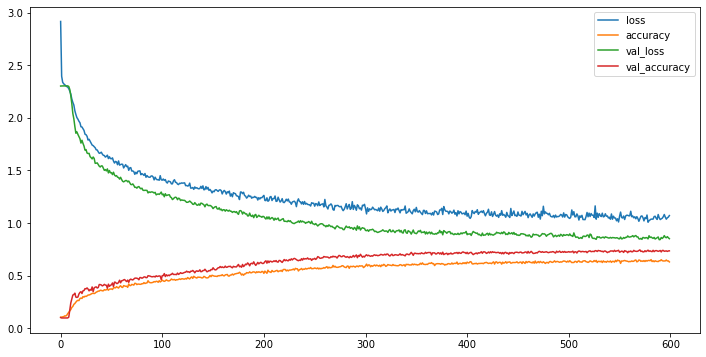

In [60]:
plotValidate(model_history)

<Figure size 1440x1080 with 0 Axes>

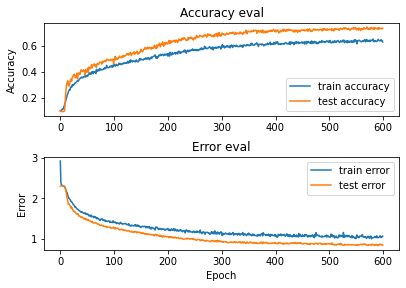

In [76]:
plot_history(model_history)

In [62]:
test_loss,test_acc=model.evaluate(X_test,y_test,batch_size=64)
print("Test loss :  ",test_loss)
print("Best Accuracy : ",test_acc*100)

63/63 [==============================] - 0s 1ms/step - loss: 0.8506 - accuracy: 0.7347
Test loss :   0.8505610227584839
Best Accuracy :  73.47347140312195


# Comparing accuracies : 
- 80:20 Split : 77.82782912254333 
- 70:30 Split : 74.92492198944092
- 60:40 Split : 76.60160064697266

80:20 Split gives best accuracy which can be seen above. Overall, there isn't any significant change in the accuracy as on running these splits again, an accuracy between the approximate range of 73-77% is obtained for all.